# Two condition in sequence

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

In [2]:
class AgentState(TypedDict):
    num1: int
    operation1: str
    num2: int
    final_num1: int
    operation2: str
    num3: int
    final_num2: int

In [3]:
def adder1(state:AgentState) -> AgentState:
    """This state is for adding two numbers."""

    state['final_num1'] = state['num1'] + state['num2']
    return state

def multiplier1(state:AgentState) -> AgentState:
    """This state is for multiplicating two numbers."""

    state['final_num1'] = state['num1'] * state['num2']
    return state

def decide_next_node1(state: AgentState) -> AgentState:
    """This state is deciding the next node with respect to the operation."""

    print("STAGE1")
    if state['operation1'] == "+":
        print("addition_stage1")
        return "addition_operation_stage1"
    elif state['operation1'] == "*":
        print('multiplication_stage1')
        return "multiplication_operation_stage1"

def adder2(state: AgentState) -> AgentState:
    """This state is for adding two numbers in the second state."""

    state['final_num2'] = state['final_num1'] + state['num3']
    return state

def subtractor2(state: AgentState) -> AgentState:
    """This state is subtracting second number from the first number in the second stage."""

    state['final_num2'] = state['final_num1'] - state['num3']
    return state

def decide_next_node2(state: AgentState) -> AgentState:
    """This state is deciding the next node with respect to the operation in the second stage."""

    print("STAGE2")
    if state['operation2'] == "+":
        print("addition_stage2")
        return "addition_operation_stage2"
    elif state['operation2'] == "-":
        print("subtraction_stage2")
        return "subtraction_operation_stage2"
    

In [4]:
graph = StateGraph(AgentState)

graph.add_node("adding_node_stage1", adder1)
graph.add_node("multiply_node_stage1", multiplier1)
graph.add_node("router_stage1", lambda state:state)

graph.add_node("adding_node_stage2", adder2)
graph.add_node("subtract_node_stage2", subtractor2)
graph.add_node("router_stage2", lambda state:state)

graph.add_edge(START, "router_stage1")
graph.add_conditional_edges(
    "router_stage1",
    decide_next_node1,
    {
        #Edge : Node
        "addition_operation_stage1" : "adding_node_stage1",
        "multiplication_operation_stage1" : "multiply_node_stage1"
    }
)
graph.add_edge("adding_node_stage1", "router_stage2")
graph.add_edge("multiply_node_stage1", "router_stage2")

graph.add_conditional_edges(
    "router_stage2",
    decide_next_node2,
    {
        #Edge : Node
        "addition_operation_stage2" : "adding_node_stage2",
        "subtraction_operation_stage2" : "subtract_node_stage2"
    }
)
graph.add_edge("adding_node_stage2", END)
graph.add_edge("subtract_node_stage2", END)

app = graph.compile()

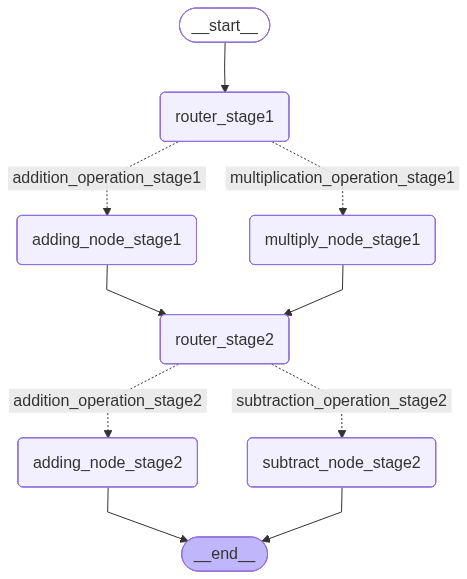

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
initial_state = AgentState(num1 = 10, num2 = 5, num3 = 7, operation1 = "+", operation2 = "+")
result = app.invoke(initial_state)
result

STAGE1
addition_stage1
STAGE2
addition_stage2


{'num1': 10,
 'operation1': '+',
 'num2': 5,
 'final_num1': 15,
 'operation2': '+',
 'num3': 7,
 'final_num2': 22}

In [7]:
initial_state = AgentState(num1 = 10, num2 = 5, num3 = 7, operation1 = "+", operation2 = "-")
result = app.invoke(initial_state)
result

STAGE1
addition_stage1
STAGE2
subtraction_stage2


{'num1': 10,
 'operation1': '+',
 'num2': 5,
 'final_num1': 15,
 'operation2': '-',
 'num3': 7,
 'final_num2': 8}

In [8]:
initial_state = AgentState(num1 = 10, num2 = 5, num3 = 7, operation1 = "*", operation2 = "+")
result = app.invoke(initial_state)
result

STAGE1
multiplication_stage1
STAGE2
addition_stage2


{'num1': 10,
 'operation1': '*',
 'num2': 5,
 'final_num1': 50,
 'operation2': '+',
 'num3': 7,
 'final_num2': 57}

In [9]:
initial_state = AgentState(num1 = 10, num2 = 5, num3 = 7, operation1 = "*", operation2 = "-")
result = app.invoke(initial_state)
result

STAGE1
multiplication_stage1
STAGE2
subtraction_stage2


{'num1': 10,
 'operation1': '*',
 'num2': 5,
 'final_num1': 50,
 'operation2': '-',
 'num3': 7,
 'final_num2': 43}